In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [34]:
pokemon = pd.read_csv("Pokemon.csv")

In [19]:
print(pokemon.head())

   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False  


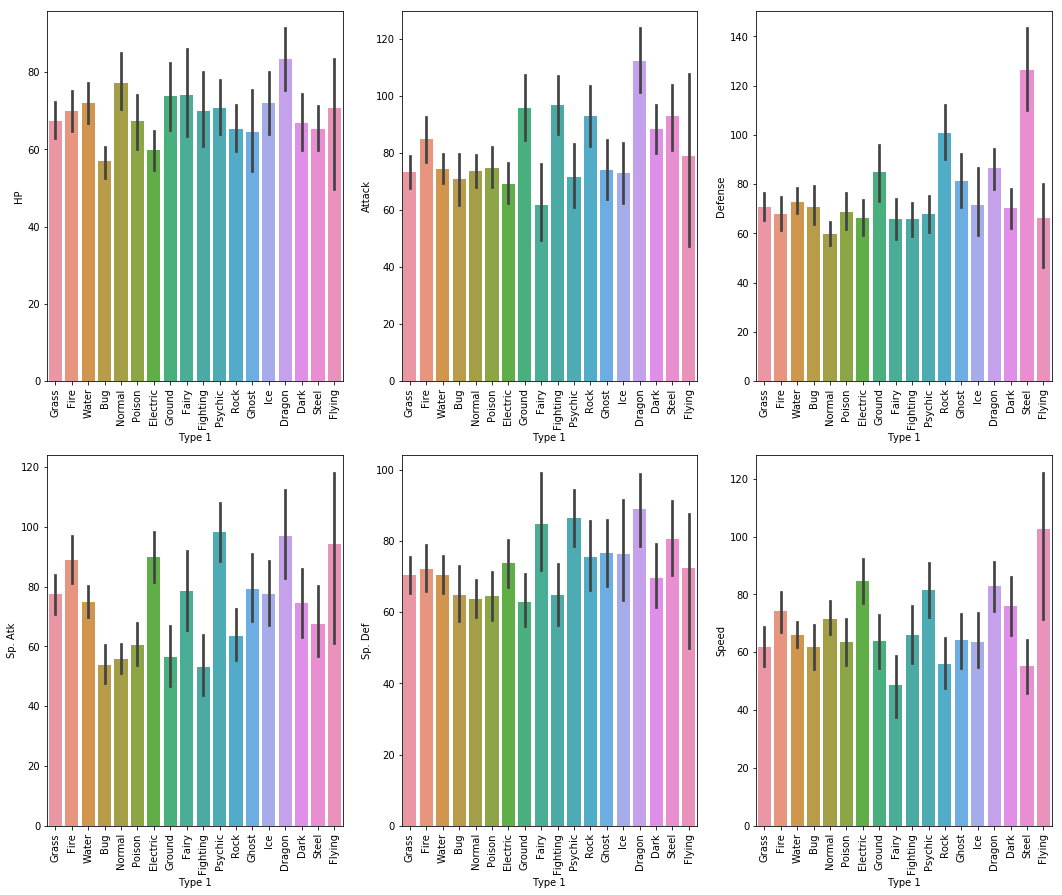

In [35]:
fig, ax = plt.subplots(2, 3, figsize = (18,15))
sns.barplot(data = pokemon, x="Type 1", y="HP",ax=ax[0,0])
sns.barplot(data = pokemon, x="Type 1", y="Attack", ax=ax[0,1])
sns.barplot(data = pokemon, x="Type 1", y="Defense", ax=ax[0,2])
sns.barplot(data = pokemon, x="Type 1", y="Sp. Atk", ax=ax[1,0])
sns.barplot(data = pokemon, x="Type 1", y="Sp. Def", ax=ax[1,1])
sns.barplot(data = pokemon, x="Type 1", y="Speed", ax=ax[1,2])


for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

plt.show()

fig.savefig("barplot.jpg")

In [ ]:
fig, ax = plt.subplots(figsize = (12,8))
sums = pokemon.Legendary.groupby(pokemon.Legendary).value_counts()
plt.axis('equal');
plt.pie(sums, labels=sums.index, explode=(0.1,0),autopct='%1.1f%%', colors=['gold', 'lightskyblue'],
        wedgeprops={"edgecolor":"k",'linewidth': 1, 'antialiased': True},
       shadow = True, startangle = 170)

plt.show()

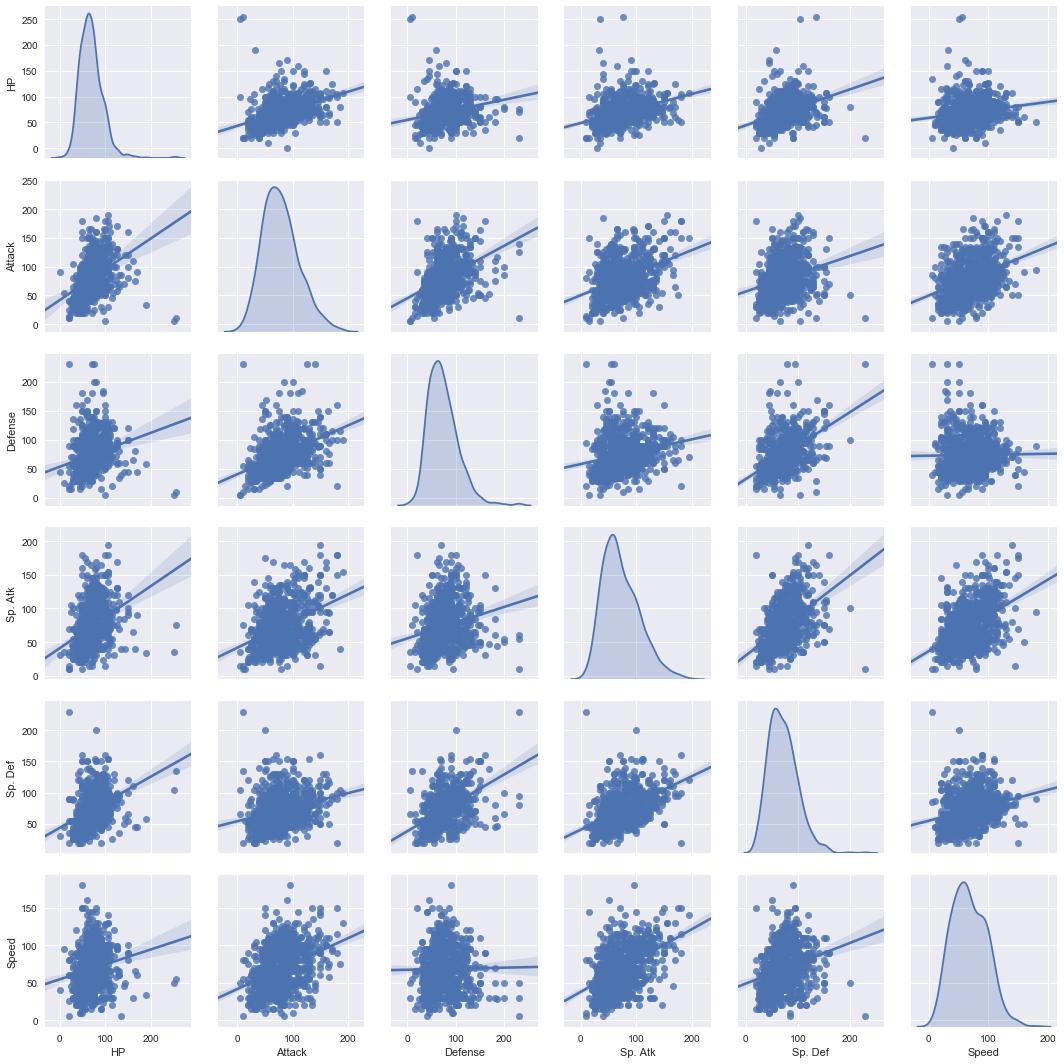

In [36]:
sns.set()
g = sns.pairplot(pokemon.iloc[:,5:11],diag_kind='kde',diag_kws=dict(shade=True), kind = 'reg')
plt.show()
g.savefig("pairplot.png")

In [ ]:
pmelt = pd.melt(pokemon, 
                id_vars=['Name','Type 1','Type 2','Legendary'], 
                value_vars=['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed'],
               var_name='Ability', value_name='Points')
print(pmelt.head())

In [ ]:
plt.figure(figsize=(9,6.5))
sns.boxplot(x='Ability',
            y='Points', 
            data= pmelt,
            hue='Legendary').set_title('Box plot of Each Ability of Pokemons (legendary vs. non-legendary)')
plt.savefig("lengendarybox.png")


In [ ]:
data1 = pokemon.loc[pokemon.Generation == 1, ]
data2 = pokemon.loc[pokemon.Generation == 2, ]
data3 = pokemon.loc[pokemon.Generation == 3, ]
data4 = pokemon.loc[pokemon.Generation == 4, ]
data5 = pokemon.loc[pokemon.Generation == 5, ]
data6 = pokemon.loc[pokemon.Generation == 6, ]


In [ ]:

p = pokemon.pivot_table(index = pokemon['Type 1'], columns='Generation', aggfunc='size').round(0)
p.fillna(0, inplace=True)

print(p)


In [ ]:
fig, ax = plt.subplots()
p = p.reindex(columns=['Generation_1', 'Generation_2', 'Generation_3', 'Generation_4', 'Generation_5', 'Generation_6'])

p.plot.bar(stacked = True, ax = ax)
plt.show()

In [ ]:
from matplotlib.colors import ListedColormap
pokemon.groupby('Type 1')['Generation']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(stacked=True, colormap=ListedColormap(sns.color_palette("GnBu", 10)), figsize = (12,8))
plt.title("No. of pokemons in each type by different Generations")
plt.show()



In [ ]:
sns.barplot(x=pokemon['Type 1'].value_counts().index, y=pokemon['Type 1'].values_count(), hue=pokemon.Generation)

In [ ]:
sns.countplot(x=pokemon['Type 1'].value_counts().index,  hue=pokemon.Generation)
plt.show()

In [28]:
pokemon_sub = pokemon.iloc[:,1:10]
print(pokemon_sub)
corr = pokemon.corr()

                          Name    Type 1  Type 2  Total   HP  Attack  Defense  \
0                    Bulbasaur     Grass  Poison    318   45      49       49   
1                      Ivysaur     Grass  Poison    405   60      62       63   
2                     Venusaur     Grass  Poison    525   80      82       83   
3        VenusaurMega Venusaur     Grass  Poison    625   80     100      123   
4                   Charmander      Fire     NaN    309   39      52       43   
5                   Charmeleon      Fire     NaN    405   58      64       58   
6                    Charizard      Fire  Flying    534   78      84       78   
7    CharizardMega Charizard X      Fire  Dragon    634   78     130      111   
8    CharizardMega Charizard Y      Fire  Flying    634   78     104       78   
9                     Squirtle     Water     NaN    314   44      48       65   
10                   Wartortle     Water     NaN    405   59      63       80   
11                   Blastoi

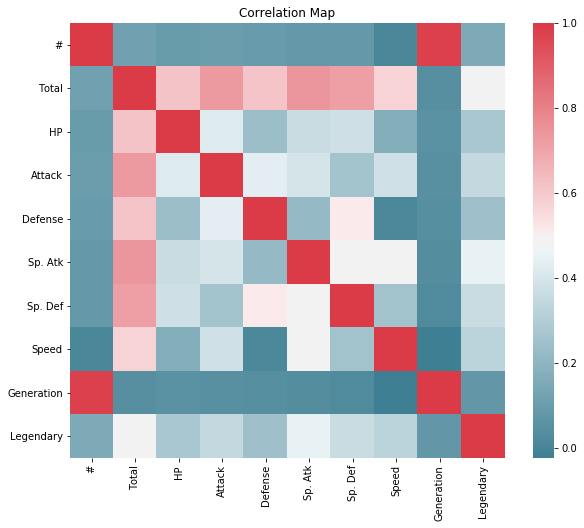

In [29]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(1300, 10, as_cmap=True),
            square=True, ax=ax)
plt.title("Correlation Map")
f.savefig("corr.png")
plt.show()


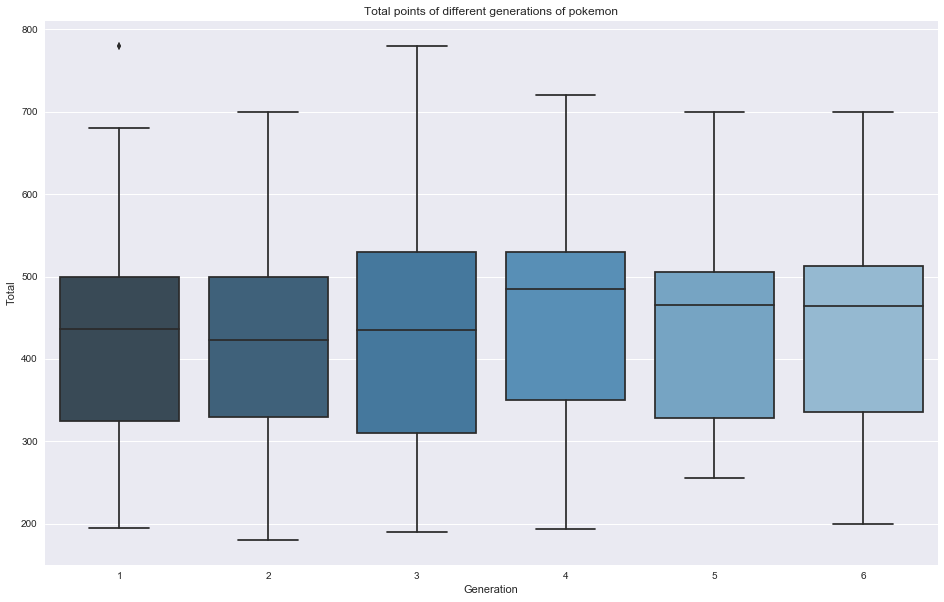

In [38]:
plt.figure(figsize=(16,10))
sns.boxplot(x='Generation',y='Total', data=pokemon
            , palette='Blues_d').set_title('Total points of different generations of pokemon')
plt.savefig("box.png")
plt.show()
